##Univariate Feature Selection: Methods like ANOVA or mutual information

## i have deleted outliers and worked with MinMaxScaler/ or keep the outliers and work with RobustScaler

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [203]:
train_data = pd.read_csv('/content/train_Insurance.csv')
test_data = pd.read_csv('/content/test_Insurance.csv')

In [204]:
train_data.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non


In [205]:
train_data['Building_Painted'].unique()

array(['N', 'V'], dtype=object)

In [206]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


## missing features: Building Dimension Geo_Code Garden

---



In [207]:
train_data.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [208]:
test_data.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension    29
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64

In [209]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2147 non-null   object 
 1   YearOfObservation   2147 non-null   int64  
 2   Insured_Period      2147 non-null   float64
 3   Residential         2147 non-null   int64  
 4   Building_Painted    2147 non-null   object 
 5   Building_Fenced     2147 non-null   object 
 6   Garden              2144 non-null   object 
 7   Settlement          2147 non-null   object 
 8   Building Dimension  2118 non-null   float64
 9   Building_Type       2147 non-null   object 
 10  NumberOfWindows     2147 non-null   object 
 11  Geo_Code            2118 non-null   object 
 12  Claim               2147 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 218.2+ KB


In [210]:
train_data = train_data.drop('Customer Id',axis=1)


## Data Imputation

In [211]:
train_data['Geo_Code'] = pd.to_numeric(train_data['Geo_Code'],errors='coerce')

In [212]:
train_data['Garden'].unique()

array(['V', 'O', nan], dtype=object)

<Axes: xlabel='Building Dimension', ylabel='Count'>

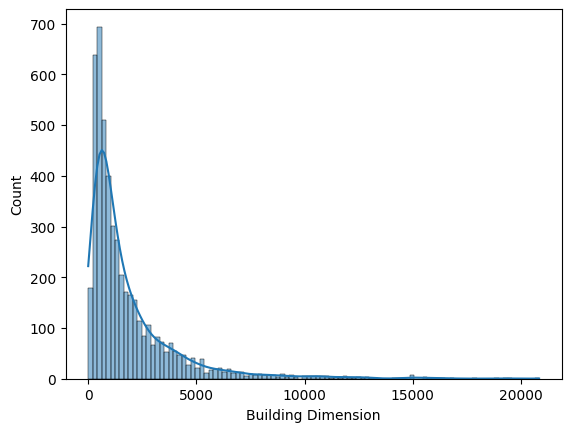

In [213]:
sns.histplot(data=train_data, x="Building Dimension", kde=True)

<Axes: xlabel='Geo_Code', ylabel='Count'>

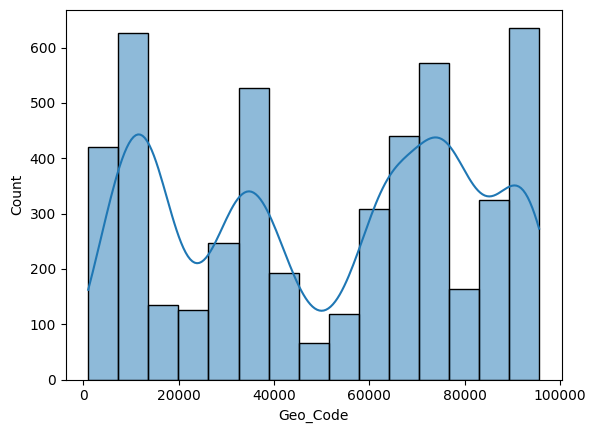

In [214]:
sns.histplot(data=train_data, x='Geo_Code', kde=True)

In [215]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
train_data['Garden'] = imputer.fit_transform(train_data.loc[:,['Garden']])

In [216]:
train_data['Building Dimension'].fillna(train_data['Building Dimension'].median(), inplace=True)


In [217]:
train_data['Geo_Code'].fillna(train_data['Geo_Code'].median(), inplace=True)

In [218]:
train_data.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [219]:
def data_cleaning(df):
  df['Geo_Code'] = pd.to_numeric(df['Geo_Code'],errors='coerce')
  df = df.drop('Customer Id',axis=1)
  imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
  df['Garden'] = imputer.fit_transform(df.loc[:,['Garden']])
  df['Building Dimension'].fillna(df['Building Dimension'].median(), inplace=True)
  df['Geo_Code'].fillna(df['Geo_Code'].median(), inplace=True)
  return df

In [220]:
test_data = data_cleaning(test_data)
test_data.head(5)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157.0,oui
1,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194.0,non
2,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050.0,oui
3,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209.0,oui
4,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177.0,non


In [221]:
test_data.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [222]:
train_data.shape

(5012, 12)

#from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()

scaler.fit(train_data[['YearOfObservation', 'Building Dimension', 'Geo_Code']])

train_data[['YearOfObservation', 'Building Dimension', 'Geo_Code']] = scaler.transform(train_data[['YearOfObservation', 'Building Dimension', 'Geo_Code']])

#Outliers Detection

In [223]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Find and remove rows where any of the values are outliers based on IQR
outliers = train_data[((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).any(axis=1)]
df = train_data.drop(outliers.index)


In [224]:
df.shape

(4615, 12)

In [225]:
df = df.reset_index(drop=True)
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117.0,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916.0,non
2,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012.0,oui
3,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631.0,non
4,2016,0.5,0,N,V,V,U,2675.0,Ordinary,without,38185.0,non
...,...,...,...,...,...,...,...,...,...,...,...,...
4610,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063.0,oui
4611,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004.0,non
4612,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059.0,non
4613,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243.0,non


In [226]:
categorical_data = []
numerical_data = []
for cl in train_data.columns:
  if train_data[cl].dtype == 'object':
    categorical_data.append(cl)
  else:
      numerical_data.append(cl)

In [227]:
numerical_data

['YearOfObservation',
 'Insured_Period',
 'Residential',
 'Building Dimension',
 'Geo_Code']

In [228]:
categorical_data

['Building_Painted',
 'Building_Fenced',
 'Garden',
 'Settlement',
 'Building_Type',
 'NumberOfWindows',
 'Claim']

In [229]:
#duplication detection
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4610    False
4611    False
4612    False
4613    False
4614    False
Length: 4615, dtype: bool

##Data Visualization

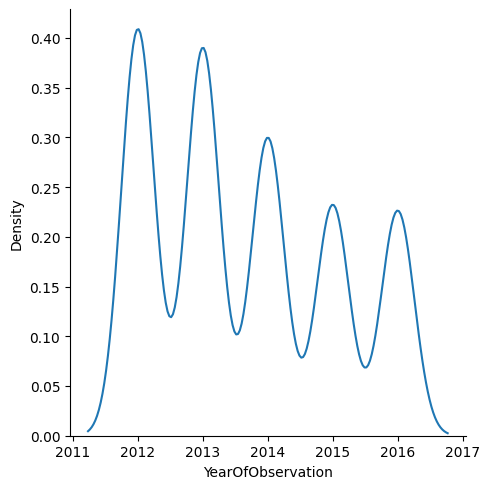

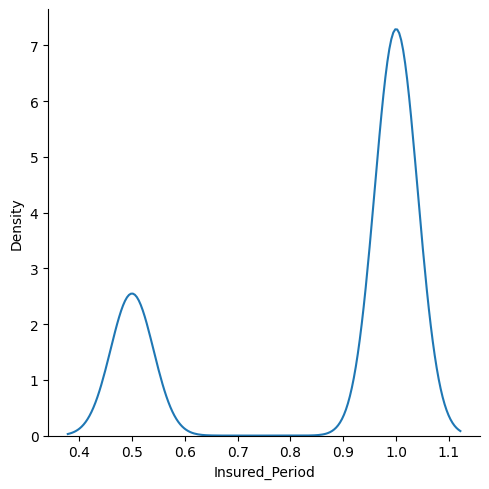

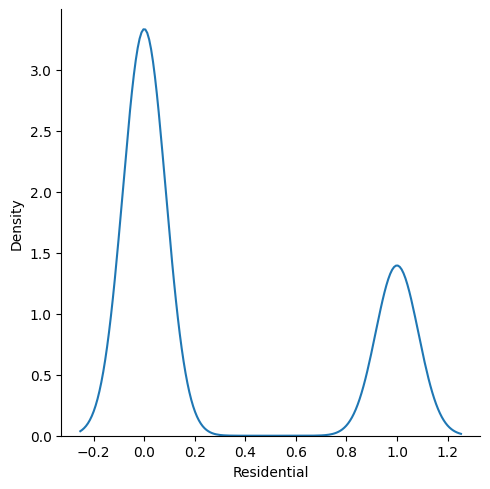

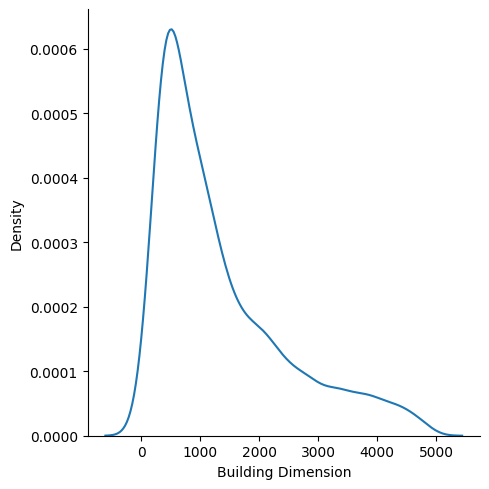

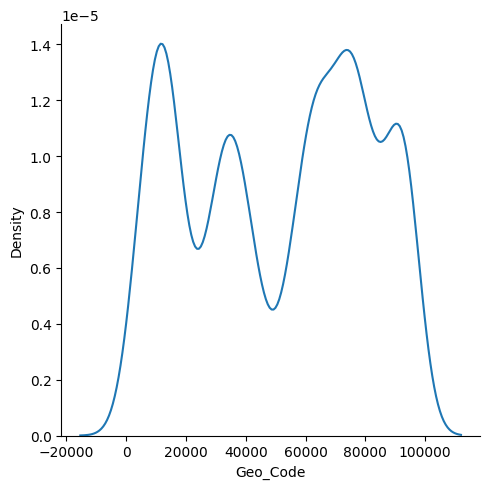

In [230]:
for c in numerical_data:
  sns.displot(df[c],kind='kde')

<Axes: xlabel='Geo_Code', ylabel='Density'>

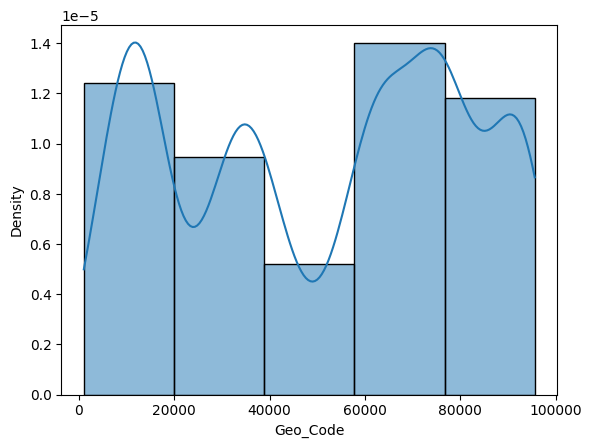

In [231]:
sns.histplot(df['Geo_Code'],
bins =5,kde=True, stat='density')

## Categorical data

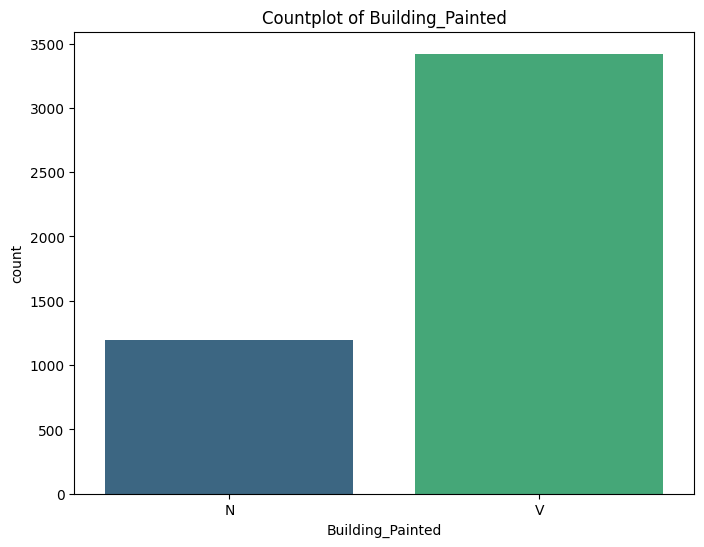

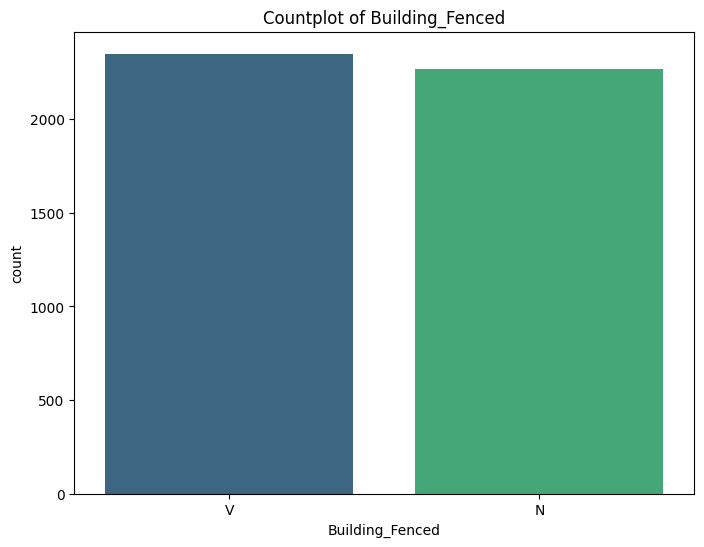

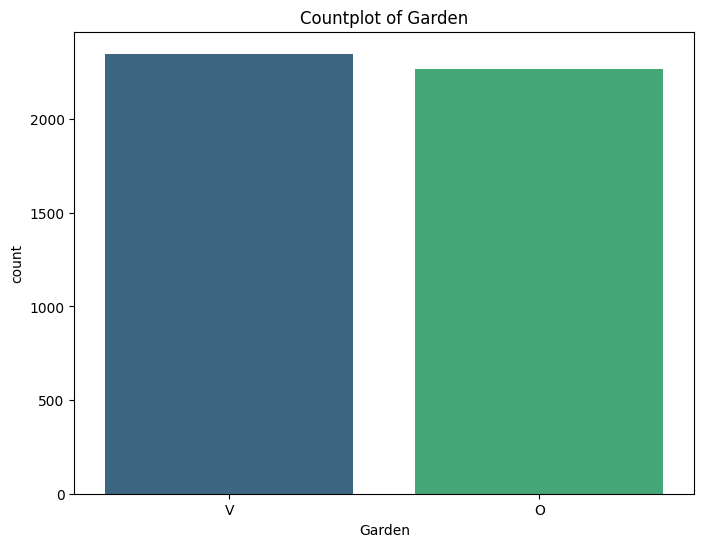

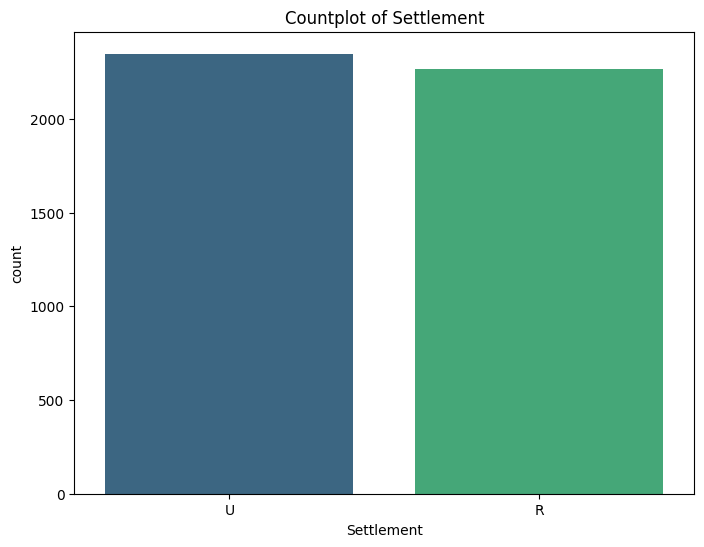

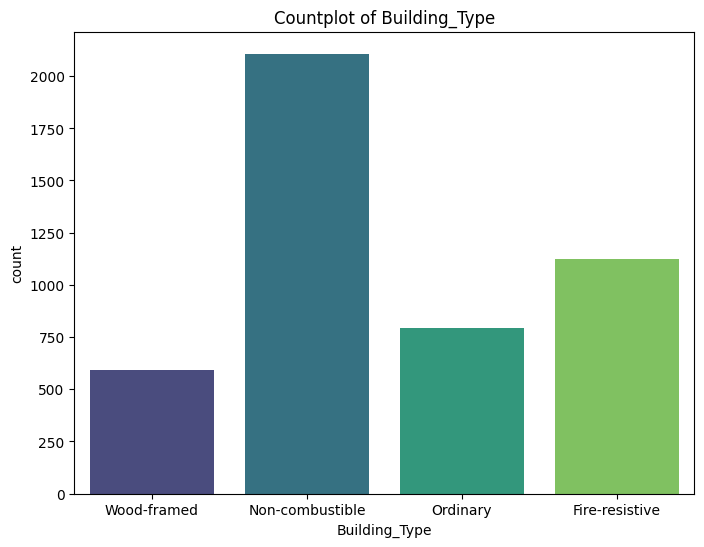

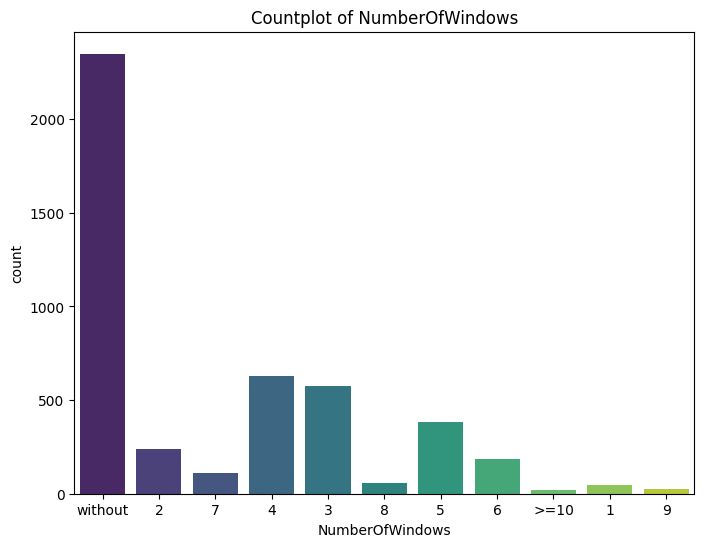

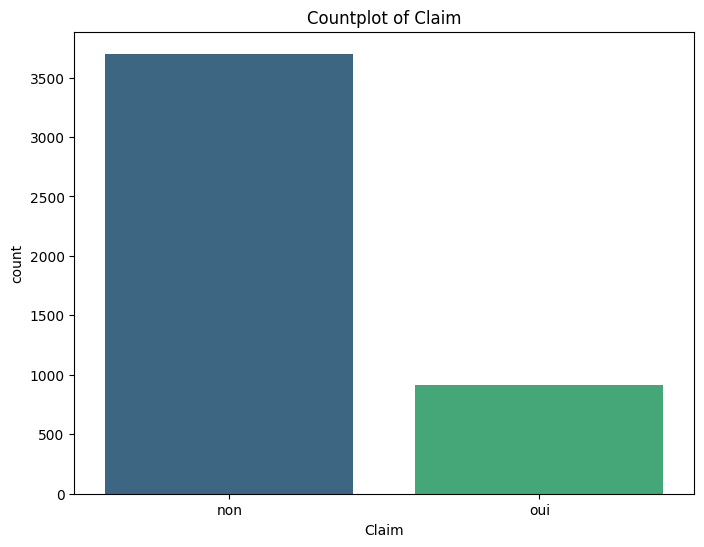

In [232]:
for feature in categorical_data:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Countplot of {feature}')
    plt.show()

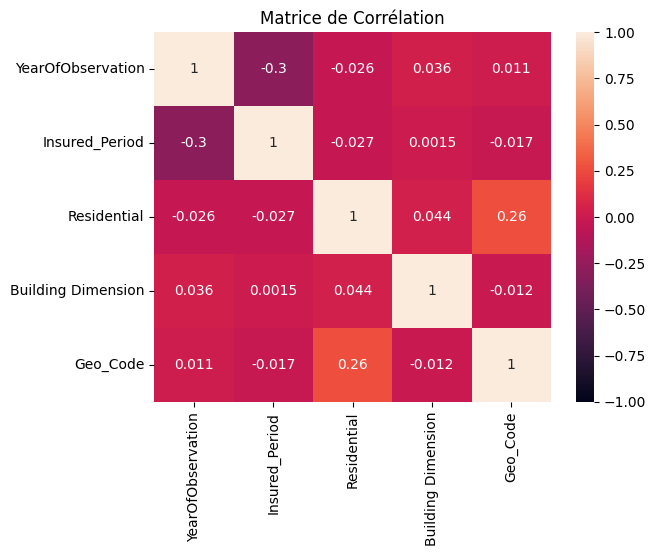

In [233]:
df_corr=df.corr(numeric_only= True)
sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

Geo_Code and Residential/ yearofobservation and insured_period are correlated

In [234]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['YearOfObservation', 'Building Dimension', 'Geo_Code']])

df[['YearOfObservation', 'Building Dimension', 'Geo_Code']] = scaler.transform(df[['YearOfObservation', 'Building Dimension', 'Geo_Code']])

# i have chosen to delete outliers so i can work with MinMaxScaler

##Encoding Categorial Data

In [235]:
df.head(2)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,0.0,1.0,1,N,V,V,U,0.256575,Wood-framed,without,0.783298,non
1,0.0,1.0,0,N,V,V,U,0.186167,Non-combustible,without,0.654261,non


In [236]:
categorical_data

['Building_Painted',
 'Building_Fenced',
 'Garden',
 'Settlement',
 'Building_Type',
 'NumberOfWindows',
 'Claim']

In [237]:
for col in categorical_data:
  print(df[col].unique())

['N' 'V']
['V' 'N']
['V' 'O']
['U' 'R']
['Wood-framed' 'Non-combustible' 'Ordinary' 'Fire-resistive']
['without' '2' '7' '4' '3' '8' '5' '6' '>=10' '1' '9']
['non' 'oui']


In [238]:
categorical_features = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement','Building_Type','Claim']

encoded_df = pd.get_dummies(df[categorical_features], drop_first=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns from the DataFrame
df.drop(categorical_features, axis=1, inplace=True)


In [239]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace('without', '0')
df['NumberOfWindows'] = df['NumberOfWindows'].replace('>=10', '10')

df

,YearOfObservation,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,Claim_oui
0,0.00,1.0,1,0.256575,0,0.783298,0,1,1,1,0,0,1,0
1,0.00,1.0,0,0.186167,0,0.654261,0,1,1,1,1,0,0,0
2,1.00,0.5,0,0.124042,0,0.052446,0,1,1,1,0,0,1,1
3,0.00,1.0,0,0.186167,0,0.598367,0,1,1,1,1,0,0,0
4,1.00,0.5,0,0.553738,0,0.392707,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610,0.25,1.0,0,0.113688,0,0.338537,0,1,1,1,0,1,0,1
4611,0.00,0.5,0,0.206875,4,0.126393,1,0,0,0,0,0,0,0
4612,0.75,1.0,1,0.099192,3,0.983628,1,0,0,0,0,1,0,0
4613,0.00,0.5,0,0.110789,4,0.774055,1,0,0,0,0,0,0,0


In [240]:

new_column_names = {
    'Building_Painted_V': 'Building_Painted',
    'Building_Fenced_V': 'Building_Fenced',
    'Garden_V': 'Garden',
    'Settlement_U': 'Settlement',
    'Claim_oui': 'Claim'
    }

df = df.rename(columns=new_column_names)

df

,YearOfObservation,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,Claim
0,0.00,1.0,1,0.256575,0,0.783298,0,1,1,1,0,0,1,0
1,0.00,1.0,0,0.186167,0,0.654261,0,1,1,1,1,0,0,0
2,1.00,0.5,0,0.124042,0,0.052446,0,1,1,1,0,0,1,1
3,0.00,1.0,0,0.186167,0,0.598367,0,1,1,1,1,0,0,0
4,1.00,0.5,0,0.553738,0,0.392707,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610,0.25,1.0,0,0.113688,0,0.338537,0,1,1,1,0,1,0,1
4611,0.00,0.5,0,0.206875,4,0.126393,1,0,0,0,0,0,0,0
4612,0.75,1.0,1,0.099192,3,0.983628,1,0,0,0,0,1,0,0
4613,0.00,0.5,0,0.110789,4,0.774055,1,0,0,0,0,0,0,0


In [241]:
def encoding(df):
  categorical_features = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement','Building_Type','Claim']
  encoded_df = pd.get_dummies(df[categorical_features], drop_first=True)
  df = pd.concat([df, encoded_df], axis=1)
  df.drop(categorical_features, axis=1, inplace=True)
  new_column_names = {
    'Building_Painted_V': 'Building_Painted',
    'Building_Fenced_V': 'Building_Fenced',
    'Garden_V': 'Garden',
    'Settlement_U': 'Settlement',
    'Claim_oui': 'Claim'
    }
  df = df.rename(columns=new_column_names)
  df['NumberOfWindows'] = df['NumberOfWindows'].replace('without', '0')
  df['NumberOfWindows'] = df['NumberOfWindows'].replace('>=10', '10')
  scaler = MinMaxScaler()
  scaler.fit(df[['YearOfObservation', 'Building Dimension', 'Geo_Code']])
  df[['YearOfObservation', 'Building Dimension', 'Geo_Code']] = scaler.transform(df[['YearOfObservation', 'Building Dimension', 'Geo_Code']])
  return df



In [242]:
test_data = encoding(test_data)
test_data

,YearOfObservation,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,Claim
0,0.25,1.0,0,0.179169,0,0.445333,1,1,1,1,0,0,0,1
1,0.75,1.0,0,0.068896,5,0.604379,1,0,0,0,0,0,0,0
2,0.25,1.0,1,0.092403,6,0.962473,1,0,0,0,0,1,0,1
3,0.75,1.0,0,0.107979,0,0.128574,0,1,1,1,1,0,0,1
4,1.00,0.5,0,0.141710,9,0.043619,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,1.00,0.5,1,0.040707,2,0.054006,1,0,0,0,0,0,1,0
2143,0.00,1.0,0,0.052078,0,0.595193,1,1,1,1,1,0,0,0
2144,0.50,1.0,0,0.034400,3,0.718959,1,0,0,0,1,0,0,0
2145,0.50,1.0,1,0.026660,0,0.719636,0,1,1,1,1,0,0,1


In [243]:
test_data.head(2)

,YearOfObservation,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,Claim
0,0.25,1.0,0,0.179169,0,0.445333,1,1,1,1,0,0,0,1
1,0.75,1.0,0,0.068896,5,0.604379,1,0,0,0,0,0,0,0


In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

X = df.drop('Claim', axis=1)
y = df['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_1 = RandomForestClassifier(random_state=0)


In [245]:
def evaluation(model):

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))


    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()



[[710  36]
 [157  20]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       746
           1       0.36      0.11      0.17       177

    accuracy                           0.79       923
   macro avg       0.59      0.53      0.53       923
weighted avg       0.73      0.79      0.74       923



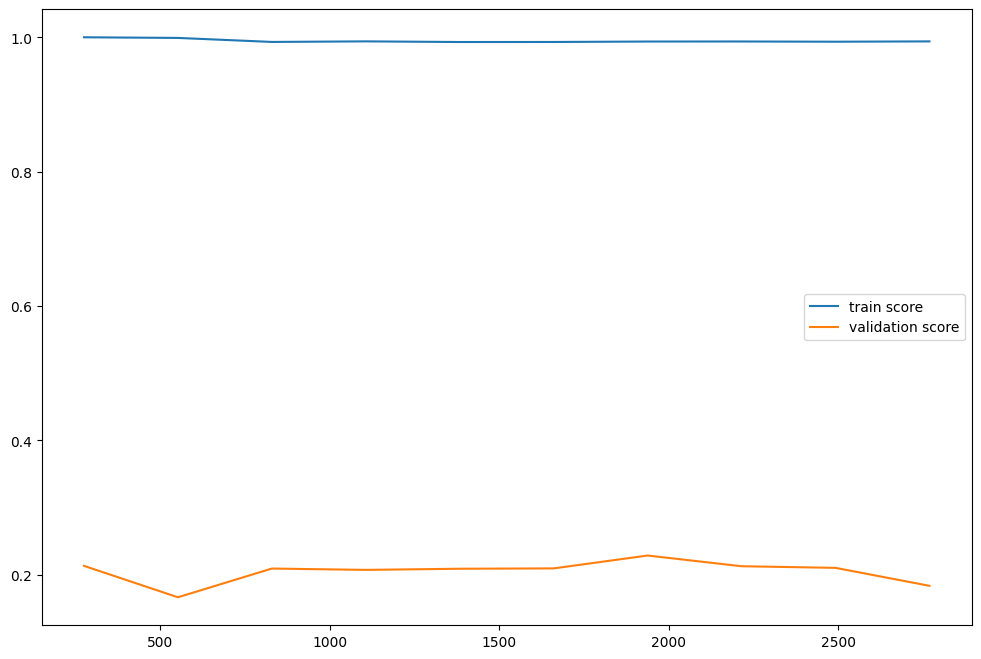

In [246]:
evaluation(model_1)


## Treating Unbalanced Target SMOTE SAMPLING TECHNIQUE

In [247]:
from imblearn.over_sampling import SMOTE

X = df.drop('Claim', axis=1)
y = df['Claim']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)
resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)


In [248]:
resampled_df

,YearOfObservation,Insured_Period,Residential,Building Dimension,NumberOfWindows,Geo_Code,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,Claim
0,0.000000,1.000000,1,0.256575,0.0,0.783298,0,1,1,1,0,0,1,0
1,0.000000,1.000000,0,0.186167,0.0,0.654261,0,1,1,1,1,0,0,0
2,1.000000,0.500000,0,0.124042,0.0,0.052446,0,1,1,1,0,0,1,1
3,0.000000,1.000000,0,0.186167,0.0,0.598367,0,1,1,1,1,0,0,0
4,1.000000,0.500000,0,0.553738,0.0,0.392707,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,0.997614,0.504772,1,0.759480,0.0,0.783267,0,1,1,1,0,0,1,1
7396,0.250000,1.000000,1,0.051563,3.0,0.179518,1,0,0,0,1,0,0,1
7397,0.906037,1.000000,1,0.665389,0.0,0.369017,0,1,1,1,1,0,0,1
7398,0.000000,1.000000,0,0.659066,0.0,0.126894,0,1,1,1,0,0,0,1


In [249]:
X = resampled_df.drop('Claim', axis=1)
y = resampled_df['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [250]:
model = RandomForestClassifier(random_state=0)


[[644 117]
 [132 587]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       761
           1       0.83      0.82      0.83       719

    accuracy                           0.83      1480
   macro avg       0.83      0.83      0.83      1480
weighted avg       0.83      0.83      0.83      1480



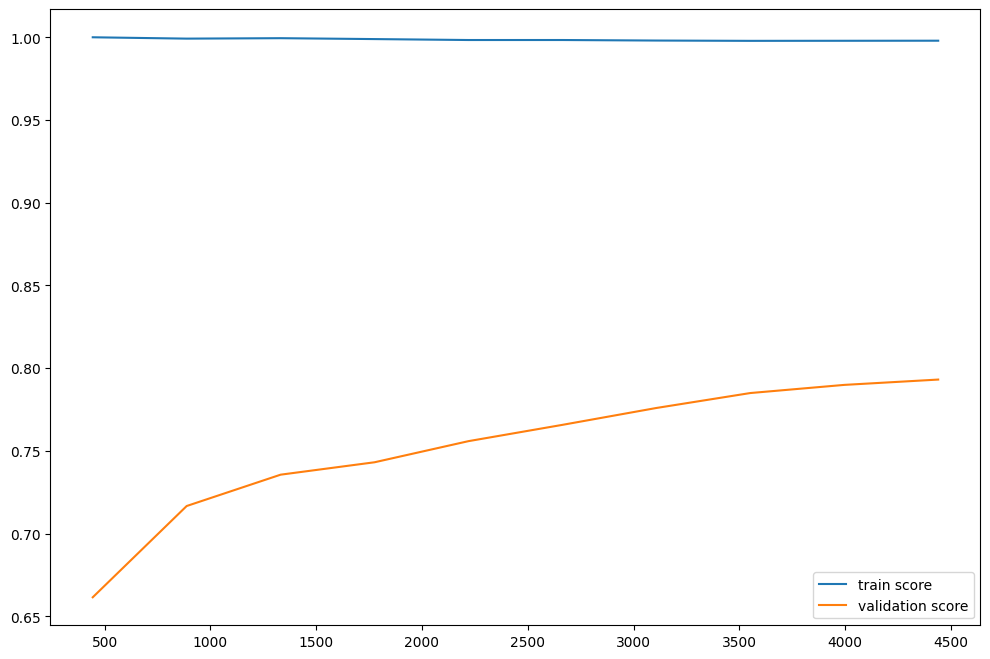

In [251]:
evaluation(model)

In [252]:
#evaluation(model_2)


<Axes: >

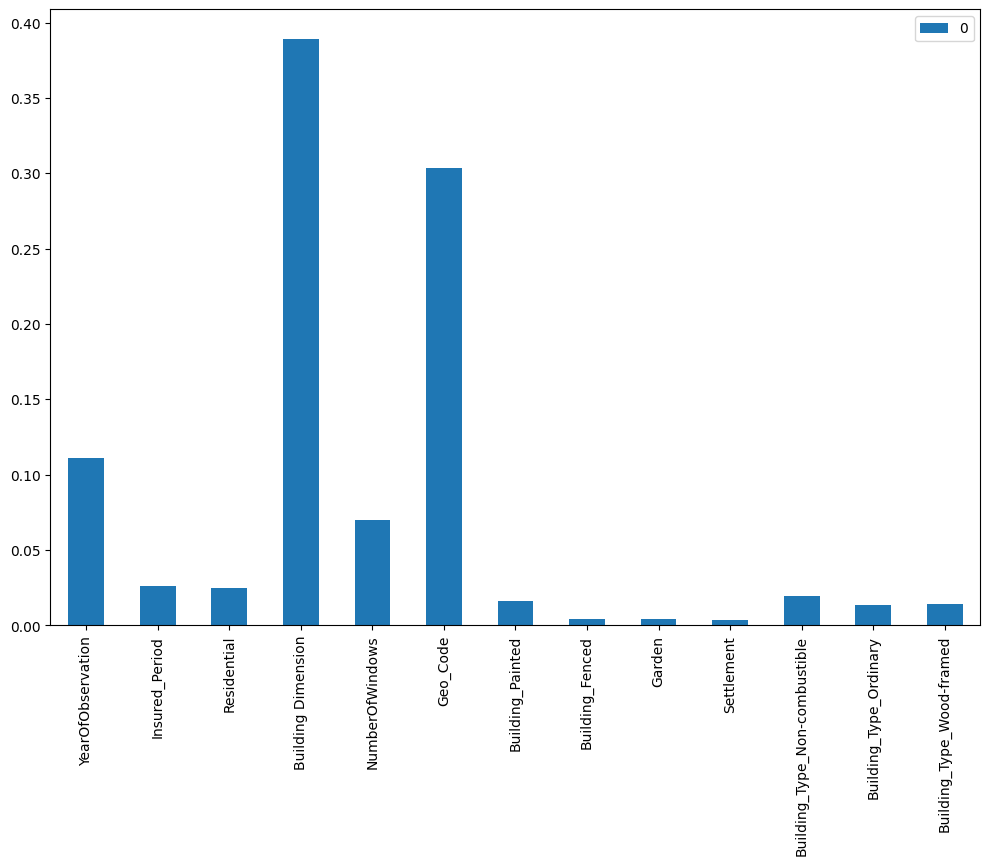

In [253]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))


##based on the RandomForestClassifier feature_importances_ (Building_Fenced Garden Settlement):: are the least important (categorical features

In [254]:
#feature selection
def feature_selection(df):
  data = df.drop(['Building_Fenced', 'Garden', 'Settlement'], axis=1)
  return data

[[642 119]
 [139 580]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       761
           1       0.83      0.81      0.82       719

    accuracy                           0.83      1480
   macro avg       0.83      0.83      0.83      1480
weighted avg       0.83      0.83      0.83      1480



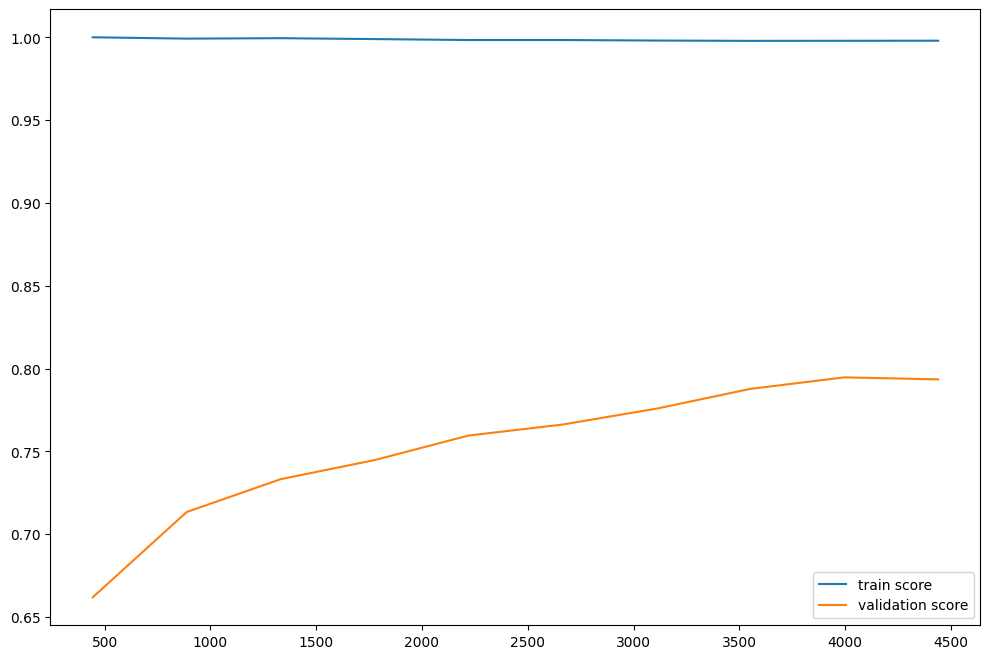

In [255]:
data = feature_selection(resampled_df)
X = data.drop('Claim', axis=1)
y = data['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classif = RandomForestClassifier(random_state=0)
evaluation(classif)

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Step 1: Prepare the Data
X_train = resampled_df.drop('Claim', axis=1)
y_train = resampled_df['Claim']
X_test = test_data.drop('Claim', axis=1)
y_test = test_data['Claim']

# Step 2: Train the Model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1639
           1       0.48      0.14      0.21       508

    accuracy                           0.76      2147
   macro avg       0.63      0.55      0.54      2147
weighted avg       0.71      0.76      0.71      2147



In [257]:
def evaluation_model(model,train,test):
  X_train = train.drop('Claim', axis=1)
  y_train = train['Claim']
  X_test = test.drop('Claim', axis=1)
  y_test = test['Claim']
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)
  print(f'Accuracy: {accuracy:.2f}')
  print('Classification Report:')
  print(report)
  print(confusion)


In [258]:
test1 = feature_selection(resampled_df)
test2 = feature_selection(test_data)

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier


In [260]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=11))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
GBC = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=0))
Tree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))

In [261]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'DecisionTree': Tree,
                  'GBC': GBC
                 }
for name, model in dict_of_models.items():
    print(name)
    evaluation_model(model,resampled_df,test_data)

RandomForest
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1639
           1       0.42      0.26      0.32       508

    accuracy                           0.74      2147
   macro avg       0.60      0.57      0.58      2147
weighted avg       0.70      0.74      0.72      2147

[[1456  183]
 [ 378  130]]
AdaBoost
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1639
           1       0.52      0.23      0.32       508

    accuracy                           0.77      2147
   macro avg       0.66      0.58      0.59      2147
weighted avg       0.73      0.77      0.73      2147

[[1533  106]
 [ 391  117]]
SVM
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1639
           1       0.57      0.18      0.27

In [262]:
from sklearn.model_selection import GridSearchCV

# Create a random forest model.
forest = RandomForestClassifier()
X_train = resampled_df.drop('Claim', axis=1)
y_train = resampled_df['Claim']
# Create a dictionary of hyperparameter values to search over.
hyperparameters = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

# Create a GridSearchCV object.
grid_search = GridSearchCV(estimator=forest, param_grid=hyperparameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data.
grid_search.fit(X_train, y_train)

# Print the best hyperparameter values.
print(grid_search.best_params_)

# Print the best score.
print(grid_search.best_score_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.8059459459459459


In [263]:
forest = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
evaluation_model(forest, resampled_df, test_data)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1639
           1       0.53      0.16      0.24       508

    accuracy                           0.77      2147
   macro avg       0.66      0.56      0.55      2147
weighted avg       0.72      0.77      0.72      2147

[[1566   73]
 [ 427   81]]
